In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('prenoms.csv', sep= ";")

In [4]:
data

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [5]:
data = data[data['preusuel'] != "_PRENOMS_RARES"]

In [6]:
data

,sexe,preusuel,annais,nombre
122,1,A,1980,3
123,1,A,1998,3
124,1,A,XXXX,21
125,1,AADAM,2009,4
126,1,AADAM,2014,3
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [7]:
data = data[data['preusuel'].str.len() >= 3]

In [8]:
data

,sexe,preusuel,annais,nombre
125,1,AADAM,2009,4
126,1,AADAM,2014,3
127,1,AADAM,2015,3
128,1,AADAM,2016,4
129,1,AADAM,2017,4
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [9]:
data.rename(columns={'preusuel': 'name'}, inplace=True)

/tmp/ipykernel_129360/4268650803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'preusuel': 'name'}, inplace=True)


In [10]:
data['name'] = data['name'].str.replace(r'[^\w\s]+', '')

/tmp/ipykernel_129360/4026639560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.replace(r'[^\w\s]+', '')


In [11]:
data.dropna(inplace= True)

/tmp/ipykernel_129360/1335109364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace= True)


In [12]:
data['name'] = data['name'].str.replace('\d+', '')

/tmp/ipykernel_129360/2597927612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.replace('\d+', '')


In [13]:
data.name = data.name.str.strip()

/tmp/ipykernel_129360/182736897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.name = data.name.str.strip()


In [14]:
vowels = ('a','e','i','o','u')

In [15]:
data['sexe'] = data['sexe'].replace({1: 'm', 2: 'f'})
df = data.assign(isVowel = lambda x: x.name.str.endswith(vowels).astype('int'))
df['NameLen'] = df['name'].str.len()


/tmp/ipykernel_129360/1144658448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sexe'] = data['sexe'].replace({1: 'm', 2: 'f'})


In [16]:
df['name'] = df["name"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [17]:
df = df.drop('annais', axis = 1)

In [18]:
df = df.drop_duplicates(subset=['name'])
df.reset_index(drop=True, inplace=True)

In [19]:
df.groupby(['sexe'])['NameLen'].mean()

sexe
f    6.753897
m    6.456860
Name: NameLen, dtype: float64

<Axes: xlabel='sexe,NameLen'>

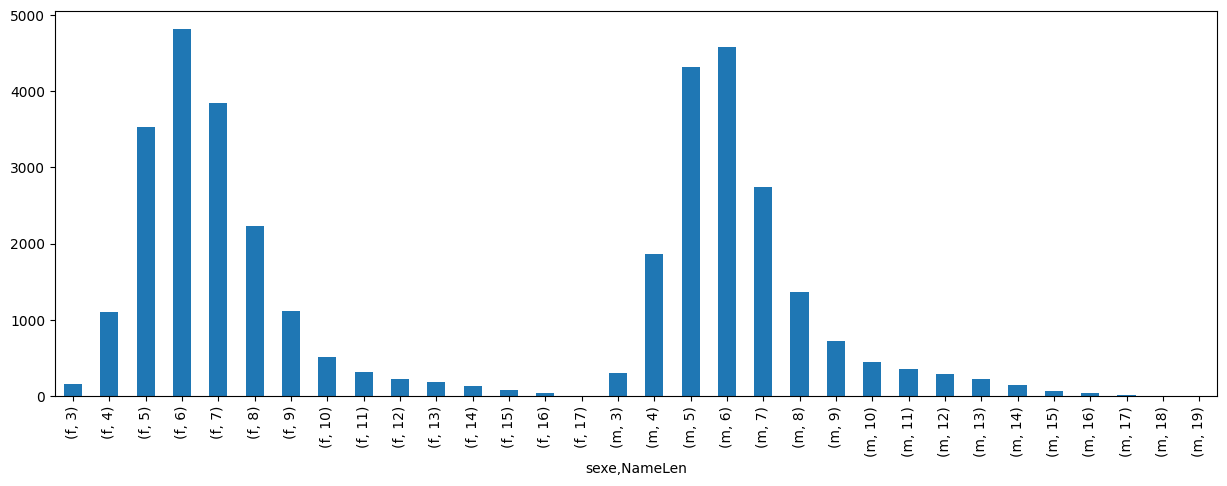

In [20]:
df.groupby(['sexe','NameLen'])['name'].count().plot(kind = 'bar',figsize=(15,5))

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:

le.fit(df.sexe)
df.sexe = le.transform(df.sexe)

In [23]:
le.classes_

array(['f', 'm'], dtype=object)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
def custom_ngram(x):
    return (x[-i-1:] for i in range(0, min(3, len(x))))

In [42]:
n=3
vect = CountVectorizer(analyzer=custom_ngram)

In [43]:
vect.fit(df.name)

CountVectorizer(analyzer=<function custom_ngram at 0x7fdff3c31040>)

In [44]:
mat = vect.transform(df.name).todense()

In [45]:
grams = pd.DataFrame(mat, columns=vect.get_feature_names_out())

In [46]:
grams

,,,A,S,A,AH,AL,AM,AN,AR,...,ZUA,ZUL,ZUR,ZY,ZYA,ZYO,ZZ,ZZA,ZZO,ZZY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
35761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
grams.shape

(35763, 3388)

In [48]:
new_df = df.join(grams)

In [49]:
new_df.dropna(inplace=True)

In [50]:
new_df.shape

(35763, 3393)

In [59]:
X = new_df.drop(['name','sexe','nombre','NameLen','isVowel'],axis=1)
y = new_df['sexe']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
     


In [62]:
feature_names = vect.get_feature_names_out()

In [63]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X_train and y_train are your training data
model = LinearSVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_preds = model.predict(X_test)

# Evaluate the model
print(metrics.confusion_matrix(y_test, y_preds))
print(metrics.classification_report(y_test, y_preds))


/home/ensai/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[[3032  559]
 [ 680 2882]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3591
           1       0.84      0.81      0.82      3562

    accuracy                           0.83      7153
   macro avg       0.83      0.83      0.83      7153
weighted avg       0.83      0.83      0.83      7153



In [67]:
model.fit(X,y)

/home/ensai/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [68]:
import pickle
with open('feature_names.pickle', 'wb') as feature_names_file:
    pickle.dump(feature_names, feature_names_file)

# Save vect to a file
with open('vect.pickle', 'wb') as vect_file:
    pickle.dump(vect, vect_file)

# Save model to a file
with open('linear_svm_model.pickle', 'wb') as model_file:
    pickle.dump(model, model_file)